#                                                                     **_Flight fare prediction_**

#### Flight fare prediction project is based on predicting the price of the flight ticket based on different features, this features includes, the airline in which you might travel, the date of journey, the place from where your journey begins source, the place where you reach destination, the route which you might take to reach your destination, this route also specifies the number of stops the airline stops inbetween the destination , the time for depature, the time of arrival, the time taken for you to travel from the source to the destination, and finally the price for the travel.

#### So based on the given data,

#### Independent variable (X) : Airline, Date_of_journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info
#### Dependent variable (Y) : Price

#### Based on the given data we can identify this as a regression problem, so we can use various machine learning problems to solve this problems which are as follows:

   * Linear regression
   * Lasso regression
   * Ridge regression
   * Decision tree regressor
   * Random forest regressor

#### I have declared this problem with random forest regression, since linear regression model doesn't gave me much accuracy.

#### Machine learning model : Random forest regressor (sklearn)
#### Data preprocessing : Pandas
#### Data visualization : Matplotlib, Seaborn
#### Web framework : Flask
#### Model deployment : Heroku platform
#### Dataset link : https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh
#### Github link : https://github.com/Vedakeerthi/FLIGHT_FARE_PREDICTION
#### Heroku link : https://flight-fare-prediction-app.herokuapp.com/

### Importing the dataset

In [1]:
import pandas as pd
train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
train_data.shape

(10683, 11)

In [3]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### Finding our dataset has any null values

In [4]:
for i in train_data.columns:
    print(f'Null object in {i} : {train_data[i].isnull().sum()}')

Null object in Airline : 0
Null object in Date_of_Journey : 0
Null object in Source : 0
Null object in Destination : 0
Null object in Route : 1
Null object in Dep_Time : 0
Null object in Arrival_Time : 0
Null object in Duration : 0
Null object in Total_Stops : 1
Null object in Additional_Info : 0
Null object in Price : 0


### Deleting the particular null value record

In [5]:
train_data.dropna(inplace=True)

### Checking whether there is a null value

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Converting the journey data to int datatype

In [7]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [8]:
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [9]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


### Converting the Departure time into hours and minutes

In [10]:
train_data['Dep_Hours'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

In [11]:
train_data['Dep_minutes'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hours,Dep_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


### Converting the Arrival time into hours and minutes

In [13]:
train_data['Arrival_hours'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

In [14]:
train_data['Arrival_minutes'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hours,Dep_minutes,Arrival_hours,Arrival_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### Removing the Date_of_journey, Arrival_time and Depature_time features

In [16]:
train_data.drop(['Date_of_Journey','Arrival_Time','Dep_Time'],inplace=True,axis=1)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hours,Dep_minutes,Arrival_hours,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### Altering the duration feature into duration hour and minutes

In [18]:
train_data['Duration_hours'] = train_data['Duration'].str.extract('(\d+)h', expand=False).astype(float)
train_data['Duration_minutes'] = train_data['Duration'].str.extract('(\d+)m', expand=False).astype(float)

### In some cases the duration will be only hours not minutes in that case there will be nan value left in minutes, so replacing them into 0

In [19]:
import numpy as np
train_data['Duration_minutes'] = train_data['Duration_minutes'].replace(np.NaN,0.0)

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hours,Dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7.0,25.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4.0,45.0


### Categorical features

### Converting the Total_Stops feature into numerical values (Ordinal categorical encoding => Label encoding)

In [21]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [22]:
train_data.replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4},inplace=True)

In [23]:
train_data['Total_Stops'].head()

0    0
1    2
2    2
3    1
4    1
Name: Total_Stops, dtype: int64

### Converting the Airline, Source, Destination into numerical values (Nominal categorical encoding => One hot encoding)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hours,Dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,5,50,13,15,7.0,25.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,9,25,4,25,19.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,18,5,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,16,50,21,35,4.0,45.0


In [25]:
train_data.drop(['Route','Duration','Additional_Info'],axis=1,inplace=True)

In [26]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hours,Dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7.0,25.0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19.0,0.0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4.0,45.0


### Creating a new dataframe for one hot encoding of categorical variables

In [27]:
train_data1 = pd.get_dummies(train_data[['Airline','Source','Destination']])

In [28]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hours,Dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7.0,25.0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19.0,0.0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4.0,45.0


In [29]:
train_data1.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
train_data = train_data.append(train_data1)

In [31]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hours,Dep_minutes,Arrival_hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jet Airways,Delhi,Cochin,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IndiGo,Kolkata,Banglore,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Removing the Airline, Source and Destination from train_data

In [32]:
train_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21364 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10682 non-null  float64
 1   Price                                      10682 non-null  float64
 2   Journey_day                                10682 non-null  float64
 3   Journey_month                              10682 non-null  float64
 4   Dep_Hours                                  10682 non-null  float64
 5   Dep_minutes                                10682 non-null  float64
 6   Arrival_hours                              10682 non-null  float64
 7   Arrival_minutes                            10682 non-null  float64
 8   Duration_hours                             10681 non-null  float64
 9   Duration_minutes                           10682 non-null  float64
 10  Airline_Air Asia      

In [34]:
train_data = train_data.replace(np.NaN,0.0)

### Finding the feature importance

<AxesSubplot:>

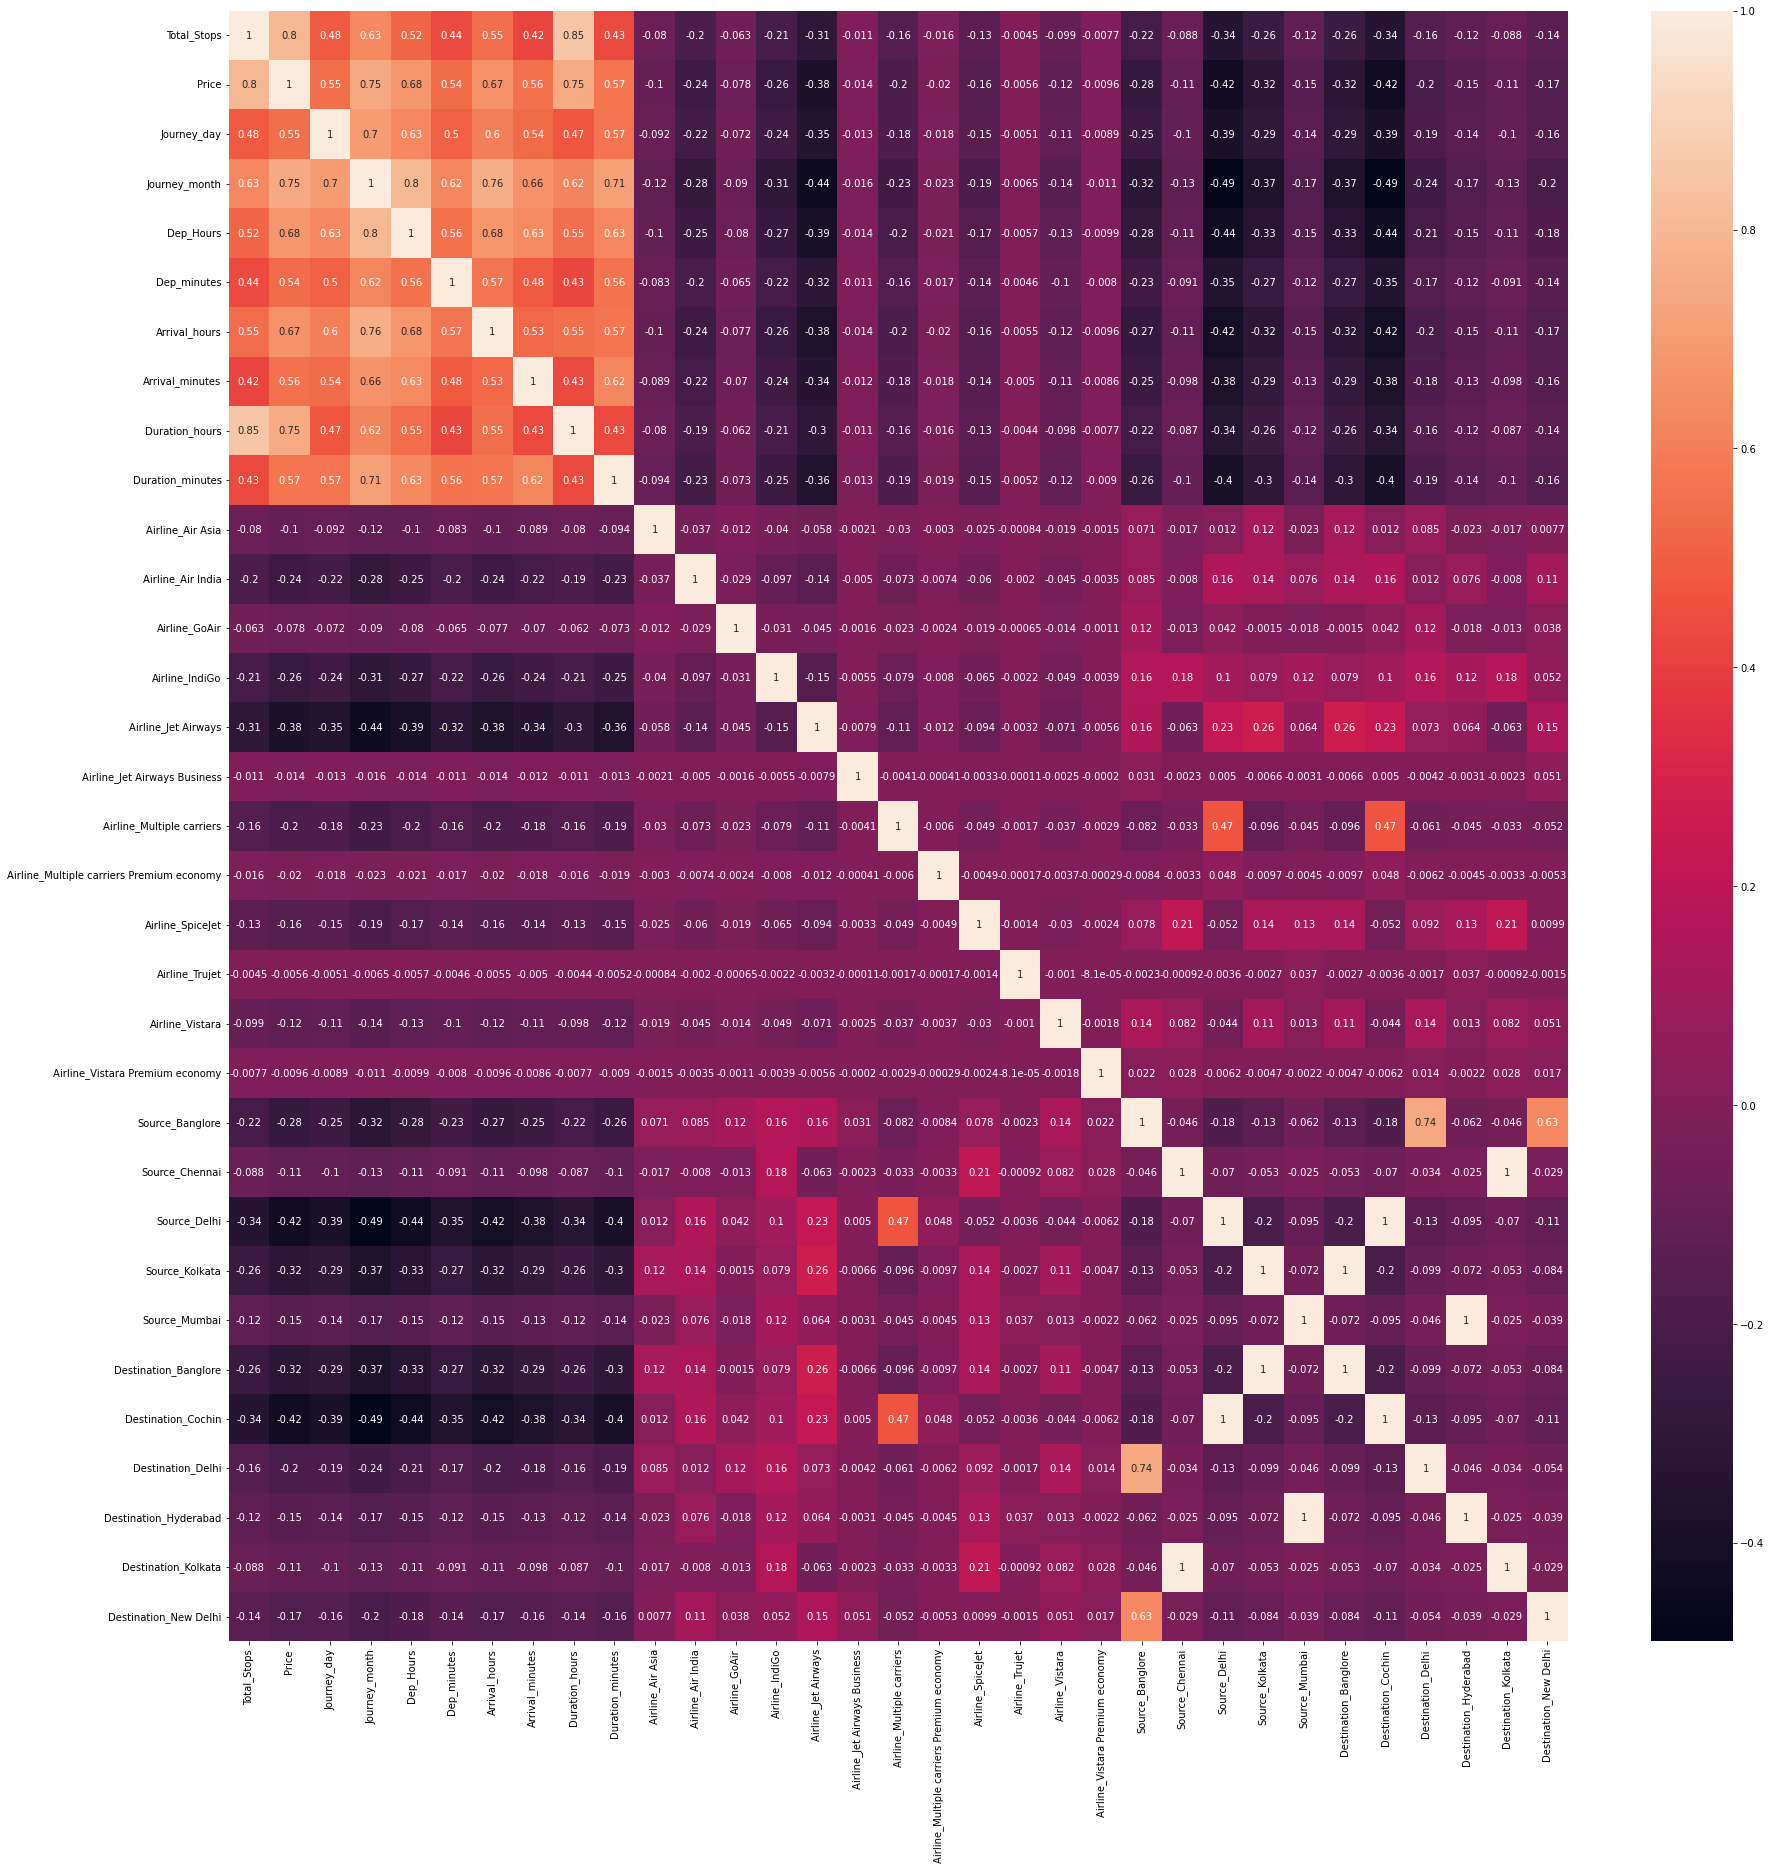

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,30))
sns.heatmap(train_data.corr(),annot=True)

### Finding feature importance throught ExtraTreesRegressor

In [36]:
X = train_data.loc[:,['Total_Stops','Journey_day','Journey_month','Dep_Hours','Dep_minutes','Arrival_hours','Arrival_minutes','Duration_hours',
                     'Duration_minutes','Airline_Air Asia','Airline_Air India','Airline_GoAir','Airline_IndiGo','Airline_Jet Airways','Airline_Jet Airways Business','Airline_Multiple carriers',
                     'Airline_Multiple carriers Premium economy','Airline_SpiceJet','Airline_Trujet','Airline_Vistara','Airline_Vistara Premium economy','Source_Banglore','Source_Chennai',
                     'Source_Delhi','Source_Kolkata','Source_Mumbai','Destination_Banglore','Destination_Cochin','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata','Destination_New Delhi']]

In [37]:
y = train_data[['Price']]

In [38]:
print(f"The shape of the training data x_train : {X.shape} Y : {y.shape}")

The shape of the training data x_train : (21364, 32) Y : (21364, 1)


In [39]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,y)

C:\Users\veda keerthi\anaconda3\envs\flightfare\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor()

In [40]:
print(etr.feature_importances_)

[0.24228886 0.08483002 0.27440124 0.09780097 0.02495184 0.06892194
 0.03073673 0.14047872 0.03558967 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


### Plotting the feature importance graph

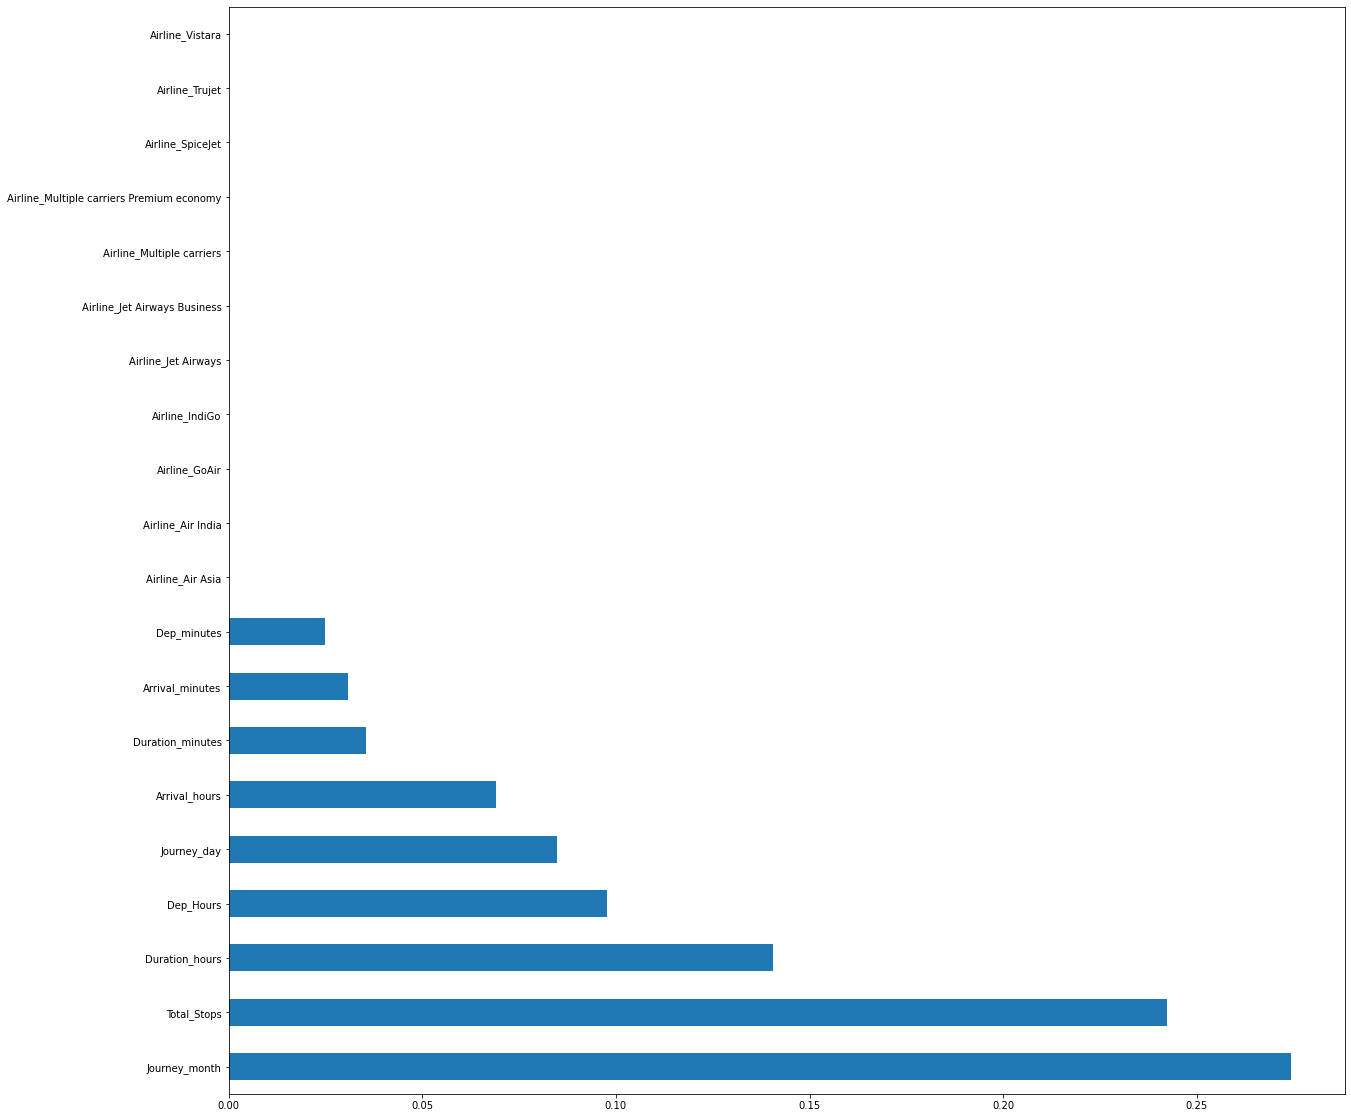

In [41]:
plt.figure(figsize = (20,20))
feat_importances = pd.Series(etr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Splitting the Data into training and testing

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8)
print(f'The size of the training and testing datasets are x_train : {x_train.shape}, y_train : {y_train.shape}, x_test : {x_test.shape}, y_test : {y_test.shape}')

The size of the training and testing datasets are x_train : (17091, 32), y_train : (17091, 1), x_test : (4273, 32), y_test : (4273, 1)


### Deploying the model

In [43]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [44]:
print(f"The score given by the Linear Regression model : {model1.score(x_test,y_test)}")

The score given by the Linear Regression model : 0.7845704130471233


In [45]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(x_train,y_train)

C:\Users\veda keerthi\anaconda3\envs\flightfare\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [46]:
print(f'The score given by the Random Forest Regressor model : {model2.score(x_test,y_test)}')

The score given by the Random Forest Regressor model : 0.8950812625842655


### Hyperparameter tuning

In [47]:
n_estimators = [int(x) for x in np.linspace(10,100,10)]
max_features =['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [48]:
from sklearn.model_selection import RandomizedSearchCV
features = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [49]:
hyperparameter_tuned_model = RandomizedSearchCV(estimator=model2,param_distributions=features)

### Fitting the training data to the model with tuned parameters

In [50]:
hyperparameter_tuned_model.fit(x_train,y_train)

C:\Users\veda keerthi\anaconda3\envs\flightfare\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\veda keerthi\anaconda3\envs\flightfare\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\veda keerthi\anaconda3\envs\flightfare\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\veda keerthi\anaconda3\envs\flightfare\lib\site-pack

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

### Model prediction for the test data

In [51]:
y_pred = hyperparameter_tuned_model.predict(x_test)

### Plotting the predicted value with the actual value

C:\Users\veda keerthi\anaconda3\envs\flightfare\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

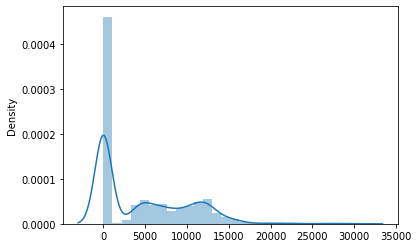

In [52]:
sns.distplot(y_pred)

C:\Users\veda keerthi\anaconda3\envs\flightfare\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

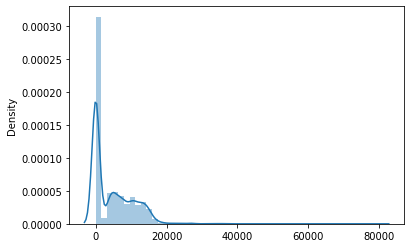

In [53]:
sns.distplot(y_test)

### Metrics calculation of the model

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f'Mean absolute error : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean square error : {mean_squared_error(y_test,y_pred)}')
print(f'The accuracy of the model (R2 Score) : {r2_score(y_test,y_pred)*100}%')

Mean absolute error : 684.8133279863697
Mean square error : 3290598.0649862573
The accuracy of the model (R2 Score) : 89.80423665922505%


### Saving the model as .pkl file

In [55]:
import pickle
file = open('Flight_fare_prediction.pkl', 'wb')
pickle.dump(hyperparameter_tuned_model, file)

model = open('Flight_fare_prediction.pkl','rb')
forest = pickle.load(model)